<a href="https://colab.research.google.com/github/subbu27iitb/Time-Series/blob/main/T_VAR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi-Variate Time Series Forecasting - Vector AR Model...sample code**\
**Reference:**\
https://www.youtube.com/watch?v=4jv1NGlAc_0 \
https://github.com/nachi-hebbar/Multivariate-Time-Series-Forecasting/blob/main/VAR_Model%20(1).ipynb


**1. Check and prepare the generic code for subplots*\
**2. Check the parameter "parse_dates=['date']" function in "pd.read_csv" function.*\
**Ans: Checked. It makes the "date" column dtype to "datetime". If not dt may remain "object".\
**3. Prepare a generic code for ADFULLER test using "adfuller()" and print p-value\
**4. Learn more abt the ADFULLER test and GRANGER_CASUALITY_TESTS.*\
**5. Check "predictions=predict.predicted_mean" in the below code. What is the significance of it ?*

** Prepare Vector ARIMA model*

Following items to be customized\
**1. date: Time stamp column heading \
**2. Check Stationarity- ADFULLER TEST: Column Name\
**3. Check Granger causality tests- ADFULLER TEST: Column Name\
**4. \
**5. 

VECTOR AUTO REGRESSION EQUATION:\
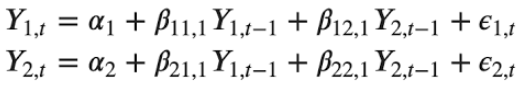

Dataset: Econometrics

In [1]:
from google.colab import files
upload=files.upload()

Saving Econometrics.csv to Econometrics.csv


Read dataset.\
Change the "date" column dtype to datetime.\
Make the date column as index_col.

In [23]:
import pandas as pd
macro_data = pd.read_csv("Econometrics.csv", parse_dates=["date"], index_col='date')
print(macro_data.shape)
print(macro_data.head(3))
print(macro_data.tail(3))
macro_data.dtypes

(123, 8)
              rgnp    pgnp   ulc  gdfco   gdf  gdfim  gdfcf  gdfce
date                                                              
1959-01-01  1606.4  1608.3  47.5   36.9  37.4   26.9   32.3   23.1
1959-04-01  1637.0  1622.2  47.5   37.4  37.5   27.0   32.2   23.4
1959-07-01  1629.5  1636.2  48.7   37.6  37.6   27.1   32.4   23.4
              rgnp    pgnp    ulc  gdfco    gdf  gdfim  gdfcf  gdfce
date                                                                
1989-01-01  4106.8  4019.9  184.1  134.8  127.7  109.5  126.6   94.0
1989-04-01  4132.5  4044.1  186.1  134.8  129.3  111.1  129.0  100.6
1989-07-01  4162.9  4068.4  187.4  137.2  130.2  109.8  129.9   98.2


rgnp     float64
pgnp     float64
ulc      float64
gdfco    float64
gdf      float64
gdfim    float64
gdfcf    float64
gdfce    float64
dtype: object

Data Visualization

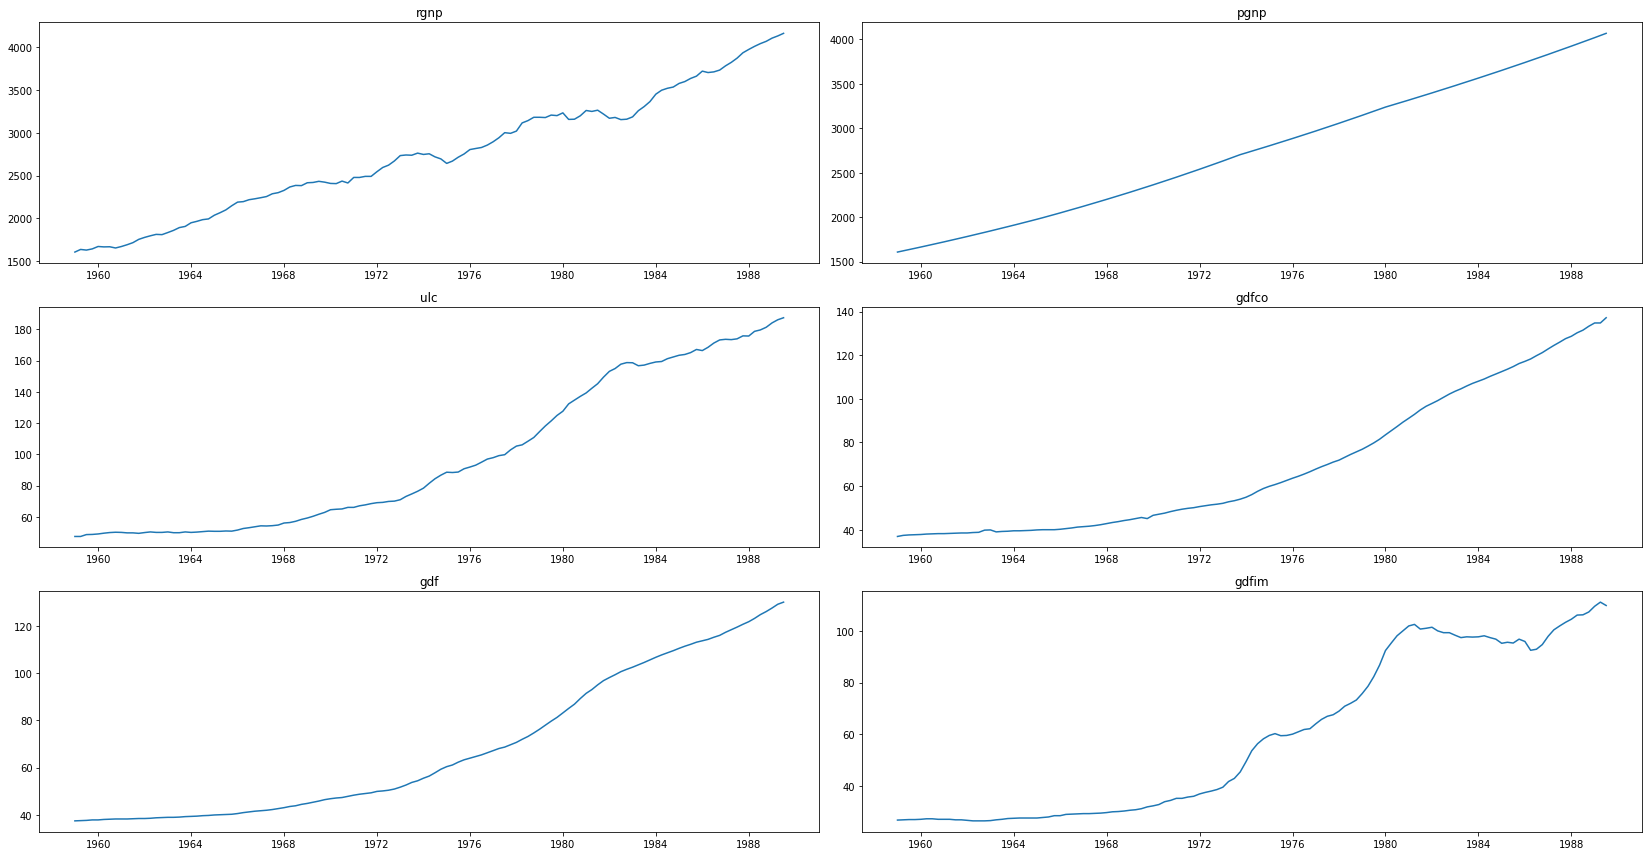

In [69]:
import matplotlib.pyplot as plt
fig,axes= plt.subplots(nrows=3, ncols=2, figsize=(23,12))
for i,ax in enumerate(axes.flatten()):
  data = macro_data[macro_data.columns[i]]
  ax.plot(data)
  #Decorations
  ax.set_title(macro_data.columns[i])
 # ax.xaxis.set_ticks_position('top')
  #ax.yaxis.set_ticks_position('none')

#plt.tight_layout()


Check Stationarity- ADFULLER TEST\
check for p-value<0.05

In [87]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
ad = adfuller(macro_data["rgnp"])
print("rgnp")
print("ADF_Statistic: ", ad[0])
print("p-value:", ad[1])

ad1 = adfuller(macro_data["ulc"])
print("ulc")
print("ADF_Statistic: ", ad1[0])
print("p-value:", ad1[1])


rgnp
ADF_Statistic:  0.6418816546694834
p-value: 0.9886037114305949
ulc
ADF_Statistic:  1.3967161828616623
p-value: 0.9970991728829679


In [88]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
ad2 = adfuller(macro_data["rgnp"].diff()[1:])
print("rgnp")
print("ADF_Statistic: ", ad2[0])
print("p-value:", ad2[1])
ad3 = adfuller(macro_data["rgnp"].diff()[1:])
print("ulc")
print("ADF_Statistic: ", ad3[0])
print("p-value:", ad3[1])

rgnp
ADF_Statistic:  -5.427594381007333
p-value: 2.9633019848469254e-06
ulc
ADF_Statistic:  -5.427594381007333
p-value: 2.9633019848469254e-06


Granger causality tests\
check for the log where p<0.05

In [92]:
print("rgnp causes ulc")
gr1= grangercausalitytests(macro_data[["ulc", "rgnp"]], 4)
print("_________________________________________")
print("ulc causes rgnp")
gr2= grangercausalitytests(macro_data[["rgnp", "ulc"]], 4)

rgnp causes ulc

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=23.9675 , p=0.0000  , df=3
likelihood ratio test: chi2=21.8515 , p=0.0001  , df=3
parameter F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.30

Find no. of lags using VAR

In [117]:
from statsmodels.tsa.api import VAR
macro_data_N = macro_data[["ulc", "rgnp"]]
train_df=macro_data_N[:-12]
test_df=macro_data_N[-12:]

model_t = VAR(train_df.diff()[1:])

sorted_order = model_t.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.778       6.834       878.3       6.800
1        5.988      6.154*       398.5       6.055
2        5.942       6.220       380.9       6.054
3        5.933       6.322       377.4       6.090
4       5.793*       6.293      328.5*      5.995*
5        5.873       6.484       356.3       6.120
6        5.828       6.550       341.1       6.119
7        5.894       6.727       365.0       6.230
8        5.890       6.835       364.8       6.271
9        5.942       6.998       385.8       6.368
10       5.930       7.097       382.9       6.401
11       5.913       7.191       378.5       6.428
12       5.885       7.274       370.7       6.445
13       5.925       7.424       388.6       6.529
14       5.882       7.493       376.0       6.532
15       5.950       7.672       406.9       6.644
16       5.933       7.766     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Fit the Forecastmodel using VARMAX()

In [120]:
from statsmodels.tsa.statespace.varmax import VARMAX
var_model = VARMAX(train_df, order=(4,0), enforce_stationarity=True)
fitted_model = var_model.fit()
print(fitted_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:357: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11835.269
                          + intercept   AIC                          23712.537
Date:                Sat, 09 Jul 2022   BIC                          23769.437
Time:                        17:06:53   HQIC                         23735.620
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):               82.47, 725.82   Jarque-Bera (JB):         23.48, 13.70
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.66, 0.28   Skew:                      0.67, -0.86
Prob(H) (two-sided):            0.13,

Forecast

In [129]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df), end=len(train_df)+n_forecast-1)
#predict = fitted_model.get_prediction(start="1989-07-01", end="1999-01-01")

predictions=predict.predicted_mean
#predict.columns= ["ulc_predicted", "rgnp_predicted"]
predictions.columns= ["ulc_predicted", "rgnp_predicted"]
predictions

,ulc_predicted,rgnp_predicted
1986-10-01,166.305471,3567.845555
1987-01-01,243.888074,3756.527751
1987-04-01,48.969483,3553.626391
1987-07-01,268.905564,3862.517474
1987-10-01,147.731578,3477.757598
1988-01-01,170.132155,3769.834465
1988-04-01,154.744258,3632.722184
1988-07-01,209.880168,3731.042460
1988-10-01,142.563279,3565.326666
1989-01-01,197.093007,3771.593613


Validate

In [134]:
test_vs_pred = pd.concat([test_df, predictions], axis =1)
print(test_vs_pred.shape)
test_vs_pred.head()

(12, 4)


,ulc,rgnp,ulc_predicted,rgnp_predicted
1986-10-01,173.2,3733.6,166.305471,3567.845555
1987-01-01,173.6,3783.0,243.888074,3756.527751
1987-04-01,173.4,3823.5,48.969483,3553.626391
1987-07-01,173.9,3872.8,268.905564,3862.517474
1987-10-01,175.8,3935.6,147.731578,3477.757598


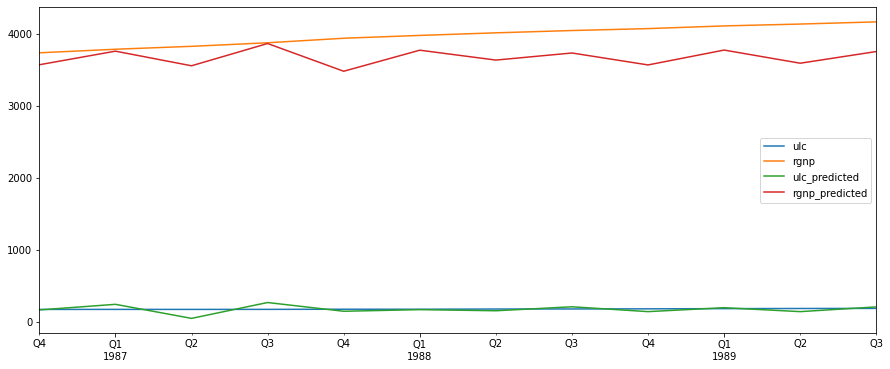

In [140]:
test_vs_pred.plot(figsize=(15,6))

Accuracy\
Find mean and mean_squared_error

In [157]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['ulc_predicted'],test_df['ulc']))

print("Mean value of ULC is :", mean(test_df['ulc']) )

print("Root Mean Squared Error is :", rmse_ulc)

rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_predicted'],test_df['rgnp']))
print("Mean value of rgnp is :", mean(test_df['rgnp']) )
print("Root Mean Squared Error is :", rmse_rgnp)


Mean value of ULC is : 178.56666666666666
Root Mean Squared Error is : 54.627591386285125
Mean value of rgnp is : 3970.6916666666666
Root Mean Squared Error is : 344.45194560805174
